In [447]:
from faker import Faker
from datetime import datetime
import random
import pandas as pd

fake = Faker()
## Generate Data
## Smaller Order Type Mean More Dificult
order_type = [1,2,3,4,5,6,7,8] 
## Higher Priority mean more important
priority = [1,2,3]

dataset = []
i = 0
while len(dataset)<100:
    order = {}
    order['id'] = i+1
    order['type'] = order_type[random.randint(0,len(order_type)-1)]
    order['priority'] = priority[random.randint(0,len(priority)-1)]
    order['uploaded_asset'] = random.randint(1,9)  
    order['important_factor'] = ( 1 if(len(order_type)-order['type']) == 0 else (len(order_type)-order['type']))* order['priority']
    order['time_spent'] = order['important_factor']* random.randint(100,200)
    i+=1
    dataset.append(order)

df = pd.DataFrame(dataset)
df.head(5)



,id,type,priority,uploaded_asset,important_factor,time_spent
0,1,2,3,4,18,3384
1,2,1,3,4,21,2121
2,3,4,2,9,8,1112
3,4,1,2,7,14,1652
4,5,4,3,2,12,1248


<AxesSubplot: >

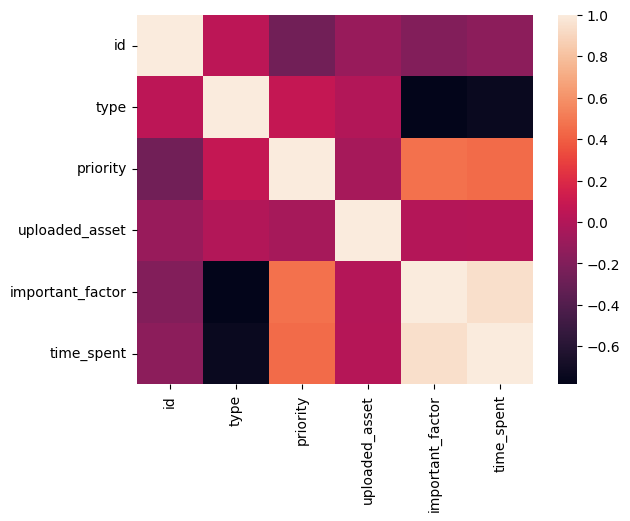

In [448]:
import seaborn as sns
sns.heatmap(df.corr())

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



minmax = StandardScaler()

X = df.iloc[:,1:-2]
y = df.iloc[:,-1]


X = minmax.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state=3)


In [450]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [451]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')

trained = svr.fit(x_train,y_train)
y_pred = trained.predict(x_test)
len(y_pred),len(y_test)

(30, 30)

In [452]:
from sklearn.metrics import mean_absolute_percentage_error

loss = mean_absolute_percentage_error(y_test,y_pred)
print(loss*100)

103.21400701331498


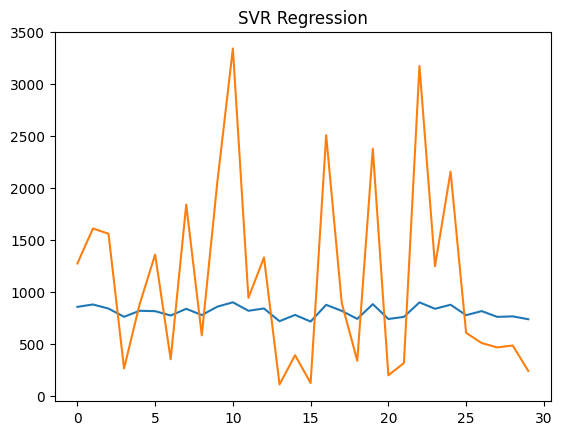

In [453]:
from matplotlib import pyplot as plt
plt.title("SVR Regression")
plt.plot(y_pred)
plt.plot(y_test)

In [454]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic_train = logistic.fit(x_train,y_train)

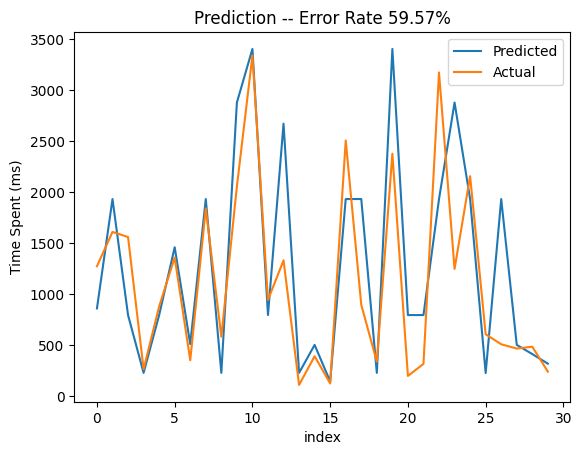

In [455]:
y_pred = logistic_train.predict(x_test)
loss = mean_absolute_percentage_error(y_test,y_pred)

plt.title("Prediction -- Error Rate "+str(round((loss*100),2))+"%")
plt.plot(y_pred,label="Predicted")
plt.plot(y_test,label="Actual")
plt.ylabel("Time Spent (ms)")
plt.xlabel("index")
plt.legend()

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                100 non-null    int64
 1   type              100 non-null    int64
 2   priority          100 non-null    int64
 3   uploaded_asset    100 non-null    int64
 4   important_factor  100 non-null    int64
 5   time_spent        100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


In [457]:
import numpy as np
np.arange(1,10,0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In [458]:
from sklearn.model_selection import GridSearchCV


parameters = {"penalty": ["l1","l2","elasticnet",None],
                "C":np.arange(1,10,1.0),
                }
grid = GridSearchCV(estimator=logistic, param_grid = parameters, cv = 2, n_jobs=-1)
grid_train = grid.fit(x_train,y_train)
y_pred_n= grid_train.predict(x_test)
loss_n = mean_absolute_percentage_error(y_test,y_pred_n)



c:\Users\harys\OneDrive\Documents\Thesis\Data Forecasting\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\harys\OneDrive\Documents\Thesis\Data Forecasting\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\harys\OneDrive\Documents\Thesis\Data Forecasting\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

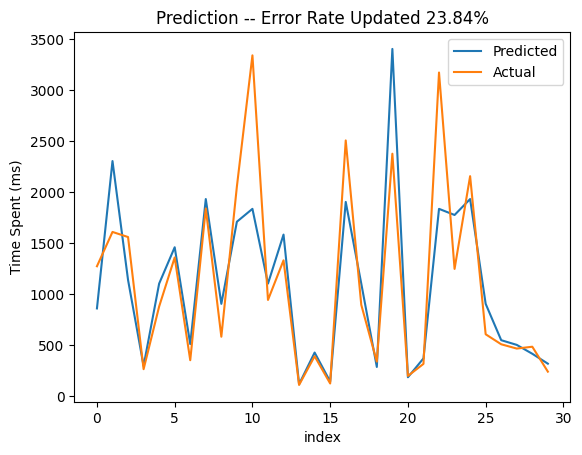

In [459]:
plt.title("Prediction -- Error Rate Updated "+str(round((loss_n*100),2))+"%")
plt.plot(y_pred_n,label="Predicted")
plt.plot(y_test,label="Actual")
plt.ylabel("Time Spent (ms)")
plt.xlabel("index")
plt.legend()